# Titanic - Machine Learning from Disaster

https://www.kaggle.com/c/titanic

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score



In [113]:
titanic_path = '/home/ubuntu/pCloudDrive/18.Kaggle microcourses/00.Kaggle micro-courses/07.Intro to Machine Learning/02.Kaggle-Competition-Titanic/titanic/'
train_data = pd.read_csv(titanic_path + 'train.csv')
test_data = pd.read_csv(titanic_path + 'test.csv')

In [114]:
#todo data exploration 

In [115]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [116]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [117]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [118]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [119]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [120]:
#todo data visualization

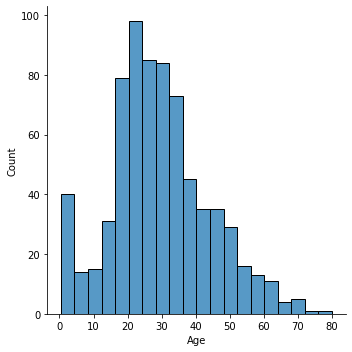

In [121]:
sns.displot(train_data['Age'])

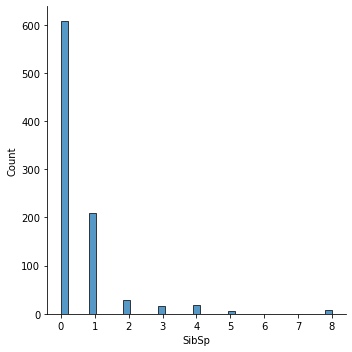

In [122]:
sns.displot(train_data['SibSp'])

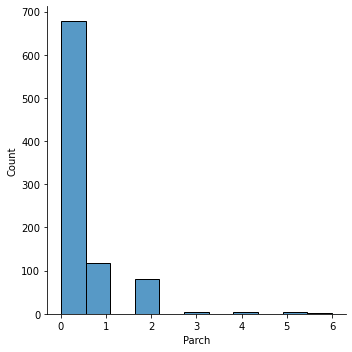

In [123]:
sns.displot(train_data['Parch'])

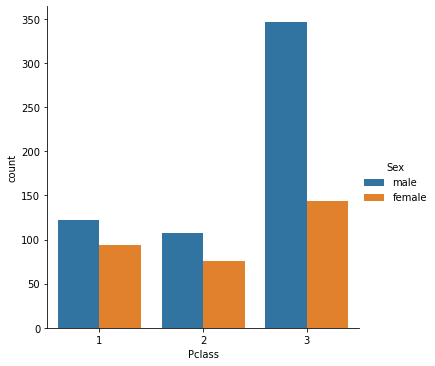

In [124]:
sns.catplot(x="Pclass", hue="Sex", kind = "count", data=train_data)

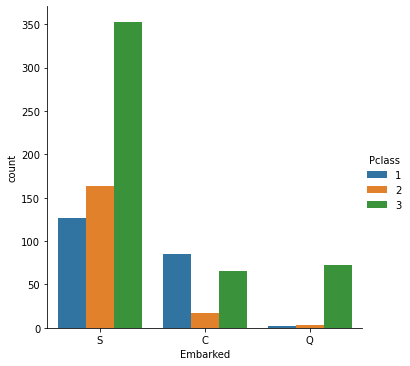

In [125]:
sns.catplot(x="Embarked", hue="Pclass", kind = "count", data=train_data)

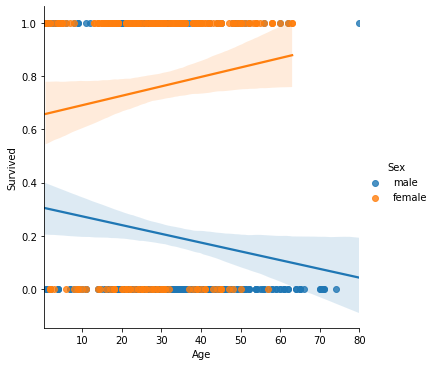

In [126]:
sns.lmplot(x='Age', y='Survived', hue='Sex',data=train_data)

In [127]:
#Choose y and X before doing processing 
y = train_data['Survived']
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [128]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [129]:
train_X

Pclass     Sex   Age  SibSp  Parch
35        1    male  42.0      1      0
46        3    male   NaN      1      0
453       1    male  49.0      1      0
291       1  female  19.0      1      0
748       1    male  19.0      1      0
..      ...     ...   ...    ...    ...
715       3    male  19.0      0      0
767       3  female  30.5      0      0
72        2    male  21.0      0      0
235       3  female   NaN      0      0
37        3    male  21.0      0      0

[668 rows x 5 columns]

In [130]:
#todo processing and preparation of training

In [131]:
column_trans = make_column_transformer((SimpleImputer(), ['Age']), (OneHotEncoder(), ['Sex']), remainder = 'passthrough') 

In [132]:
column_trans.fit_transform(train_X)

array([[42.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ],
       [30.07368224,  0.        ,  1.        ,  3.        ,  1.        ,
         0.        ],
       [49.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        ],
       ...,
       [21.        ,  0.        ,  1.        ,  2.        ,  0.        ,
         0.        ],
       [30.07368224,  1.        ,  0.        ,  3.        ,  0.        ,
         0.        ],
       [21.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ]])

In [133]:
logreg = LogisticRegression()

In [134]:
pipe = make_pipeline(column_trans, logreg) 
pipe.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(), ['Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(), ['Sex'])])),
                ('logisticregression', LogisticRegression())])

In [135]:
val_predictions1 = pipe.predict(val_X)

[[110  18]
 [ 27  68]]
0.7982062780269058


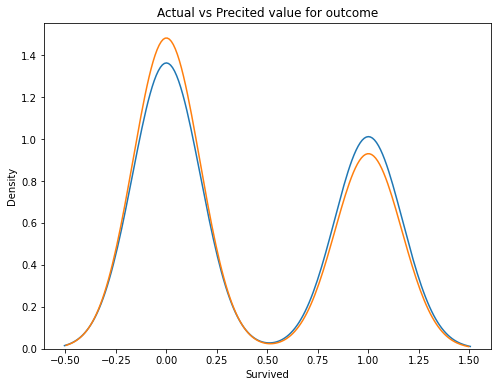

In [136]:

print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
    
plt.figure(figsize=(8, 6))

sns.kdeplot(val_y, label="Actual Value")
sns.kdeplot(val_predictions1, label="Predicted Values")

plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In [137]:
#todo processing and preparation of test data

In [138]:
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2), 
          SVC(kernel = 'linear'), 
          GaussianNB(), 
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0), 
          RandomForestClassifier(n_estimators = 10, random_state = 0)]
for x in models:
    pipe = make_pipeline(column_trans, x) 
    pipe.fit(train_X, train_y)
    val_predictions1 = pipe.predict(val_X)
    print(confusion_matrix(val_y, val_predictions1))
    print(accuracy_score(val_y, val_predictions1))

[[110  18]
 [ 27  68]]
0.7982062780269058
[[112  16]
 [ 41  54]]
0.7443946188340808
[[111  17]
 [ 31  64]]
0.7847533632286996
[[114  14]
 [ 34  61]]
0.7847533632286996
[[108  20]
 [ 29  66]]
0.7802690582959642
[[106  22]
 [ 33  62]]
0.7533632286995515


### Predicting on test data and generating submission file

In [139]:
#Choose y and X before doing processing 
X = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [140]:
X

Pclass     Sex   Age  SibSp  Parch
0         3    male  34.5      0      0
1         3  female  47.0      1      0
2         2    male  62.0      0      0
3         3    male  27.0      0      0
4         3  female  22.0      1      1
..      ...     ...   ...    ...    ...
413       3    male   NaN      0      0
414       1  female  39.0      0      0
415       3    male  38.5      0      0
416       3    male   NaN      0      0
417       3    male   NaN      1      1

[418 rows x 5 columns]

In [141]:
X.notnull().sum()

Pclass    418
Sex       418
Age       332
SibSp     418
Parch     418
dtype: int64

In [142]:
column_trans = make_column_transformer((SimpleImputer(), ['Age']), (OneHotEncoder(), ['Sex']), remainder = 'passthrough') 
column_trans.fit_transform(X)

array([[34.5       ,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ],
       [47.        ,  1.        ,  0.        ,  3.        ,  1.        ,
         0.        ],
       [62.        ,  0.        ,  1.        ,  2.        ,  0.        ,
         0.        ],
       ...,
       [38.5       ,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ],
       [30.27259036,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ],
       [30.27259036,  0.        ,  1.        ,  3.        ,  1.        ,
         1.        ]])

In [143]:
pipe = make_pipeline(column_trans, logreg)
## pipe.fit_transform(X)

In [145]:
y = pipe.predict(X)

In [147]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y})
output.to_csv('titanic_submission_3.csv', index=False)